# An Example Of Facial Features

HOG is a Histogram of Orientation Gradients. This notebook will represent the HOG features for a number of faces in the LFW dataset

* Import relevany Python libraries

In [10]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
from skimage import color, feature
import cv2
import pandas as pd
import os
from random import randint

import sys
sys.path.append('../') 
from utils import show_side_by_side, load_image_as_array, show_image

image_size = (300,300)
lfw_dir = '../lfw'

* Load an image to work with and convert to gray scale

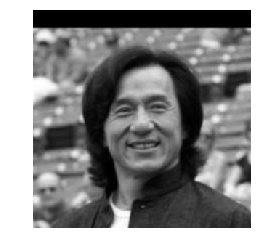

In [2]:
image = load_image_as_array('../lfw/Jackie_Chan/Jackie_Chan_0001.jpg', 
                            convert_colour=cv2.COLOR_BGR2GRAY, 
                            image_size=image_size)
show_image(image)


* Now perform feature extraction using HOG

In [3]:
hog_vec, hog_vis = feature.hog(image, visualise=True)

C:\Users\mastreff\AppData\Local\Continuum\anaconda3\lib\site-packages\skimage\feature\_hog.py:150: skimage_deprecation: Default value of `block_norm`==`L1` is deprecated and will be changed to `L2-Hys` in v0.15. To supress this message specify explicitly the normalization method.
  skimage_deprecation)
C:\Users\mastreff\AppData\Local\Continuum\anaconda3\lib\site-packages\skimage\feature\_hog.py:248: skimage_deprecation: Argument `visualise` is deprecated and will be changed to `visualize` in v0.16
  'be changed to `visualize` in v0.16', skimage_deprecation)


* And display side by side

(Note the 1-hog_vis makes this a black-on-white visualisation, removing the '1-' means white on black) 

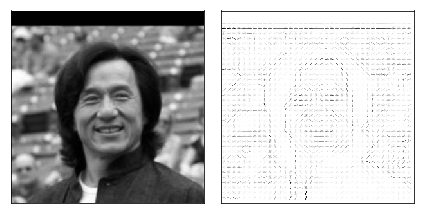

In [4]:
show_side_by_side([image, 1-hog_vis])

### Let's look at some more examples

Let's get a view of what data we have, we'll show the names with the most faces

In [7]:
df_names = pd.read_csv('../lfw/lfw-names.txt', delim_whitespace=True, names=['name', 'count'])
df_training_names = df_names.sort_values(by=['count'], ascending=False).reset_index()

In [8]:
df_training_names

,index,name,count
0,1871,George_W_Bush,530
1,1047,Colin_Powell,236
2,5458,Tony_Blair,144
3,1404,Donald_Rumsfeld,121
4,1892,Gerhard_Schroeder,109
5,373,Ariel_Sharon,77
6,2175,Hugo_Chavez,71
7,2941,Junichiro_Koizumi,60
8,2468,Jean_Chretien,55
9,2682,John_Ashcroft,53


And let's display 10 random images complete with their HOG representation

C:\Users\mastreff\AppData\Local\Continuum\anaconda3\lib\site-packages\skimage\feature\_hog.py:150: skimage_deprecation: Default value of `block_norm`==`L1` is deprecated and will be changed to `L2-Hys` in v0.15. To supress this message specify explicitly the normalization method.
  skimage_deprecation)
C:\Users\mastreff\AppData\Local\Continuum\anaconda3\lib\site-packages\skimage\feature\_hog.py:248: skimage_deprecation: Argument `visualise` is deprecated and will be changed to `visualize` in v0.16
  'be changed to `visualize` in v0.16', skimage_deprecation)


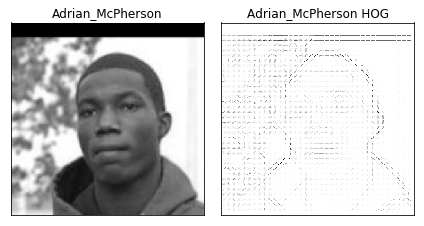

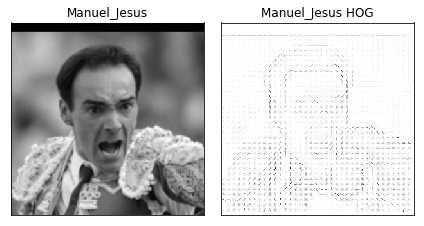

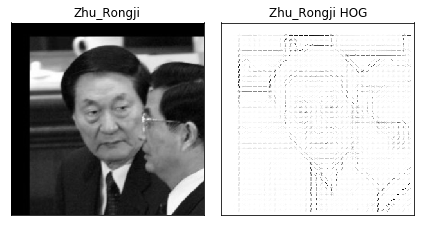

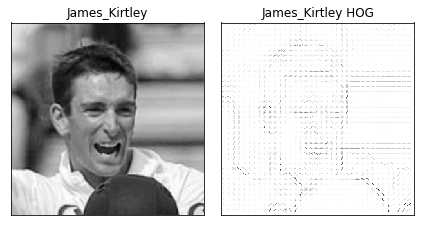

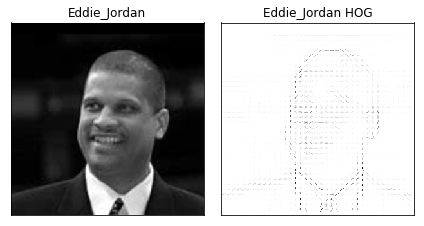

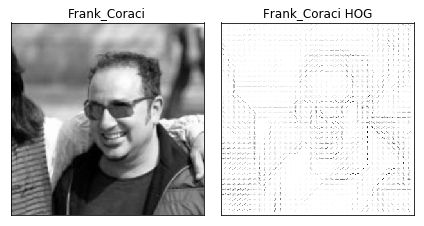

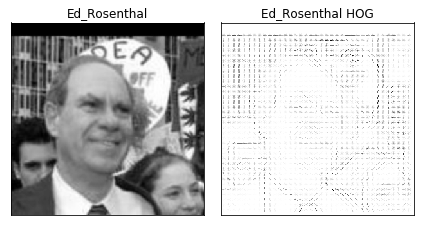

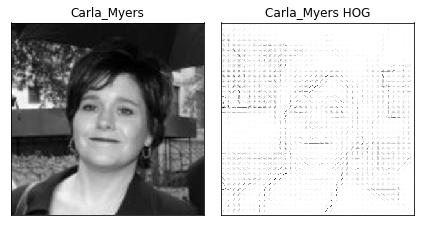

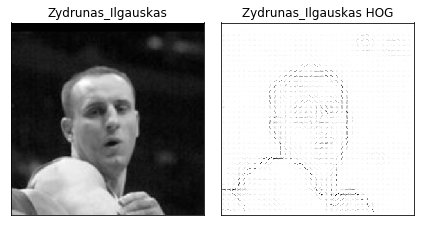

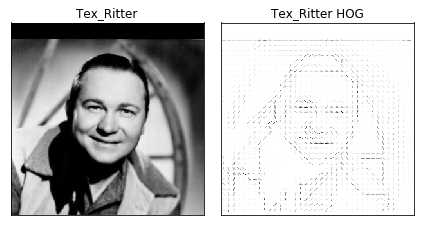

In [11]:
num_names = len(df_training_names)
for i in range(10):
    name = df_training_names.iloc[randint(1, num_names)]['name']
    files = os.listdir(os.path.join(lfw_dir, name))
    file = files[randint(0, len(files) - 1)]
    image = load_image_as_array(os.path.join(lfw_dir, name, file), 
                            convert_colour=cv2.COLOR_BGR2GRAY, 
                            image_size=image_size)
    hog_vec, hog_vis = feature.hog(image, visualise=True)
    show_side_by_side([image, 1-hog_vis], labels=[name, '{} HOG'.format(name)])